In [1]:
import os
import scipy as sp
import numpy as np

from scipy import ndimage
from scipy import misc

from PIL import Image
from matplotlib import pyplot as plt

import json

import cv2
import Preprocess

In [2]:
data_path = "./cars"
imgsub = "img"
annsub = "ann"
files = os.listdir(os.path.join(data_path,imgsub))
files

['S_8167620536848.jpg',
 'S_8167620604457.jpg',
 'S_8167620631166.jpg',
 'S_8167620725509.jpg',
 'S_8167620760584.jpg',
 'S_8167620916404.jpg',
 'S_8167620961483.jpg',
 'S_8167621010409.jpg',
 'S_8167621046436.jpg',
 'S_8167621073957.jpg',
 'S_8167621116854.jpg',
 'S_8167621266993.jpg',
 'S_8167621349883.jpg']

(1108, 1478, 3)


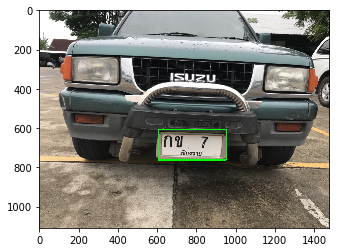

In [3]:
#load Image and Json DATA
file = files[0]
file_name = file.split('.')[0]
imglocation = os.path.join(data_path,imgsub,file)
jsonlocation = os.path.join(data_path,annsub,file_name + ".json")

with open(jsonlocation) as f:
    data = json.load(f)
p= data['objects'][0]['points']['exterior']
p1 = tuple(p[0])
p2 = tuple(p[1])
im = cv2.imread(imglocation)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
cv2.rectangle(im,p1,p2,(0,255,0),5)
plt.imshow(im)
print(im.shape)

((606, 608), (951, 761))

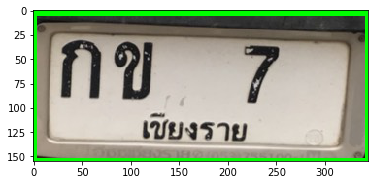

In [4]:
plate = im[p1[0]:p2[1],p1[0]:p2[0],:]
plt.imshow(plate)
p1,p2

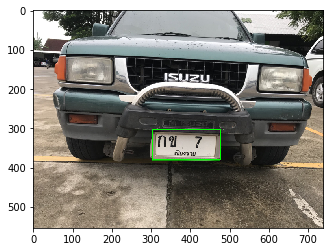

In [5]:
res = cv2.resize(im,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

S_8167620536848 (606, 608) (951, 761)
S_8167620604457 (606, 608) (951, 761)
S_8167620631166 (606, 608) (951, 761)
S_8167620725509 (606, 608) (951, 761)
S_8167620760584 (606, 608) (951, 761)
S_8167620916404 (606, 608) (951, 761)
S_8167620961483 (606, 608) (951, 761)
S_8167621010409 (606, 608) (951, 761)
S_8167621046436 (606, 608) (951, 761)
S_8167621073957 (606, 608) (951, 761)
S_8167621116854 (606, 608) (951, 761)
S_8167621266993 (606, 608) (951, 761)
S_8167621349883 (606, 608) (951, 761)


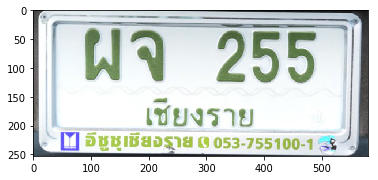

In [6]:
features = []
labels = []

for file in files :
    #load Image and Json data
    file_name = file.split('.')[0]
    imglocation = os.path.join(data_path,imgsub,file)
    jsonlocation = os.path.join(data_path,annsub,file_name + ".json")

    with open(jsonlocation) as f:
        data = json.load(f)
    p= data['objects'][0]['points']['exterior']
    x = tuple(p[0])
    y = tuple(p[1])
    im = cv2.imread(imglocation)
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plate = im[x[1]:y[1],x[0]:y[0],:]
    print(file_name,p1,p2)
    cv2.imwrite(data_path+"/plate/"+file_name+".jpg",plate)
    plt.imshow(plate)
    im2 = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    features.append(im2)
    labels.append(np.asarray([x[0],x[1],y[0],y[1]]))

features = np.asarray(features)
labels = np.asarray(labels)

In [7]:
features,labels

(array([[[255, 255, 255, ...,  31,  28,  26],
         [255, 255, 255, ...,  27,  26,  25],
         [255, 255, 255, ...,  24,  25,  26],
         ...,
         [131, 130, 134, ..., 219, 203, 181],
         [131, 134, 141, ..., 215, 216, 210],
         [132, 136, 142, ..., 199, 209, 213]],
 
        [[237, 237, 238, ..., 153, 158, 165],
         [237, 237, 238, ..., 111, 125, 139],
         [237, 237, 238, ...,  70,  88, 102],
         ...,
         [ 83,  80,  75, ..., 138, 144, 146],
         [ 82,  80,  80, ..., 133, 138, 140],
         [ 81,  80,  84, ..., 116, 118, 123]],
 
        [[253, 253, 252, ...,  46,  39,  35],
         [253, 252, 252, ...,  47,  37,  31],
         [252, 252, 252, ...,  45,  34,  27],
         ...,
         [189, 181, 180, ..., 139, 148, 140],
         [186, 181, 179, ..., 139, 154, 151],
         [182, 182, 183, ..., 132, 153, 155]],
 
        ...,
 
        [[ 19,  18,  20, ...,  95,  96,  96],
         [ 15,  16,  19, ...,  96,  96,  97],
         [ 15,

In [8]:
import pytesseract
pytesseract.image_to_string(plate,lang='tha')

'ป ผจ 255\n\nะ [ไ อิชชเซชิขอราช ส ร 755100-1 29 “2'

In [9]:
print(pytesseract.image_to_boxes(plate,lang='tha'))

ป 14 238 22 243 0
ผ 82 131 146 244 0
จ 145 92 233 243 0
2 232 52 346 242 0
5 346 127 409 242 0
5 409 127 565 242 0
ะ 19 20 23 23 0
[ 581 0 581 0 0
ไ 48 9 80 42 0
อ 92 16 108 41 0
ิ 108 37 110 41 0
ช 113 9 130 35 0
ช 135 16 145 35 0
เ 145 9 164 34 0
ซ 581 0 581 0 0
ช 167 16 177 34 0
ิ 177 36 185 41 0
ข 188 16 205 34 0
อ 208 15 224 34 0
ร 228 10 243 34 0
า 244 15 257 34 0
ช 260 15 277 34 0
ส 286 14 306 33 0
ร 314 13 368 82 0
7 370 12 381 32 0
5 386 12 394 32 0
5 402 12 413 31 0
1 419 12 426 31 0
0 426 12 428 31 0
0 440 11 447 31 0
- 455 11 469 31 0
1 475 11 485 30 0
2 495 9 515 36 0
9 516 8 522 10 0
“ 581 0 581 0 0
2 550 11 558 18 0
~ 0 37 14 40 0
~ 0 0 48 37 0
~ 0 40 24 69 0
~ 0 69 24 253 0
~ 527 0 581 37 0
~ 546 69 581 253 0
~ 559 37 581 40 0
~ 559 40 581 69 0


In [10]:
features.shape

(13, 1108, 1478)

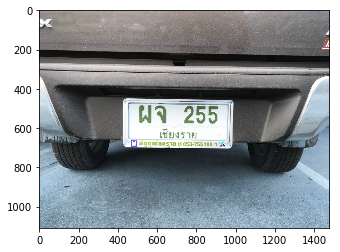

In [11]:
plt.imshow(im)

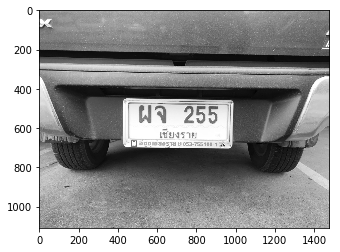

In [12]:
res = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
plt.imshow(res,cmap='gray')

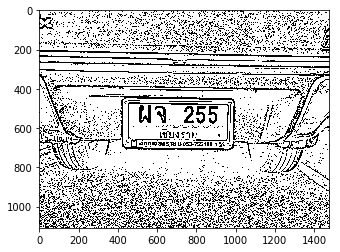

In [13]:
#adaptive Thresold
th3 = cv2.adaptiveThreshold(res,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,31,5)
plt.imshow(th3,cmap='gray')

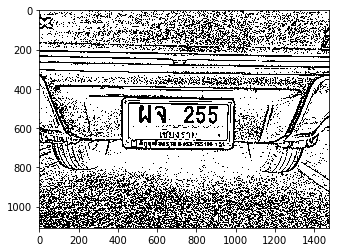

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
opening = cv2.morphologyEx(th3, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

In [15]:
import cv2 as cv

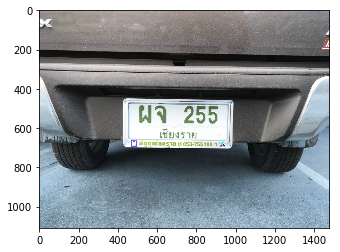

In [16]:
plt.imshow(im)

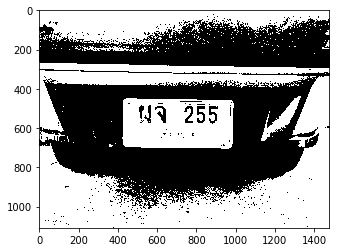

In [17]:
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(im2,cmap='gray')

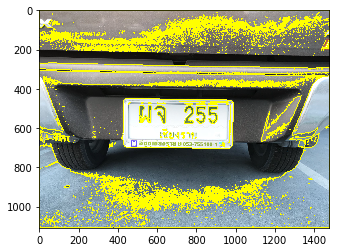

In [18]:
img = cv.drawContours(im, contours, -1, (255,255,0), 3)
plt.imshow(img)

[[[529 998]]]
[[[579 996]]]
[[[513 990]]

 [[514 991]]

 [[516 991]]

 [[515 990]]]
[[[557 988]]

 [[556 989]]

 [[557 990]]

 [[559 990]]

 [[560 991]]

 [[562 991]]

 [[560 989]]

 [[558 989]]]
[[[553 986]]]
[[[556 985]]

 [[556 986]]]
[[[590 984]]

 [[590 986]]]
[[[551 983]]

 [[552 983]]]
[[[543 983]]

 [[543 985]]

 [[544 985]]

 [[544 984]]

 [[545 983]]]
[[[537 980]]

 [[536 981]]

 [[536 982]]

 [[538 982]]

 [[538 980]]]
[[[561 979]]

 [[561 980]]

 [[562 979]]]
[[[573 978]]

 [[574 978]]]
[[[505 978]]

 [[505 979]]]
[[[504 976]]]
[[[510 975]]]
[[[556 974]]

 [[556 975]]

 [[557 975]]]
[[[514 974]]

 [[513 975]]

 [[512 975]]

 [[512 976]]

 [[513 977]]

 [[515 977]]

 [[517 975]]

 [[518 975]]

 [[517 974]]]
[[[551 973]]

 [[550 974]]

 [[549 974]]

 [[549 975]]

 [[547 977]]

 [[546 977]]

 [[545 976]]

 [[543 976]]

 [[543 978]]

 [[544 979]]

 [[546 979]]

 [[548 981]]

 [[548 983]]

 [[549 982]]

 [[548 981]]

 [[550 979]]

 [[552 979]]

 [[552 978]]

 [[554 976]]

 [[553